# Result Analysis


Here, we will analyze the data obtained from the execution of the memetic algorithm. This notebook will be divided into 2 different sections, the real life problems and the benchmarks. We will mainly make use of pandas to analyze the data obtained from the executions.

---


## Real Life Problems (RLP)

In [18]:
import pandas as pd
import re

# Read data
df = pd.read_csv('real_problems.csv')
df = df.sort_values(by='id')
df.head()

,id,cost,time,solution
0,P1,189,0.532,Route 1: 8 5 ; Route 2: 3 1 2 4 6 7 ;
1,P1,189,0.546,Route 1: 4 7 6 2 1 3 ; Route 2: 5 ; Route 3: 8 ;
28,P1,189,0.530,Route 1: 4 6 7 2 1 3 ; Route 2: 8 ; Route 3: 5 ;
27,P1,189,0.633,Route 1: 8 ; Route 2: 4 7 6 2 1 3 ; Route 3: 5 ;
26,P1,189,0.496,Route 1: 5 ; Route 2: 3 1 2 4 7 6 ; Route 3: 8 ;


In [3]:
# I want a new df with the min cost for each id, the average time and the solution from a minimum cost solution
df_min_max = df.groupby('id').agg(
    min_cost=('cost', 'min'),
    avg_time=('time', 'mean'),
    solution_min_cost=('solution', lambda x: x[df.loc[x.index, 'cost'].idxmin()])
).reset_index()
latex_table = df_min_max.to_latex(index=False)
print(latex_table)

\begin{tabular}{lrrl}
\toprule
id & min_cost & avg_time & solution_min_cost \\
\midrule
P1 & 189 & 0.533000 & Route 1: 8 5 ; Route 2: 3 1 2 4 6 7 ;  \\
P2 & 133 & 0.515143 & Route 1: 5 ; Route 2: 4 3 1 2 ; Route 3: 7 6 8 ;  \\
P3 & 100 & 0.541250 & Route 1: 8 ; Route 2: 4 5 1 2 3 ; Route 3: 6 7 ;  \\
P4 & 245 & 0.654000 & Route 1: 5 4 3 2 1 ; Route 2: 6 9 ; Route 3: 7 8 ;  \\
P5 & 111 & 0.703800 & Route 1: 9 3 ; Route 2: 4 1 2 5 ; Route 3: 8 6 7 ;  \\
P6 & 199 & 0.852600 & Route 1: 7 8 6 ; Route 2: 9 10 ; Route 3: 3 1 2 4 5 ;  \\
P7 & 211 & 0.865111 & Route 1: 3 1 2 5 4 ; Route 2: 10 7 ; Route 3: 8 9 6 ;  \\
P8 & 207 & 0.730778 & Route 1: 6 10 5 4 ; Route 2: 3 2 9 7 8 1 ;  \\
\bottomrule
\end{tabular}



In [7]:
# print lines with id P5
df_p5 = df[df['id'] == 'P5']
for elem in df_p5['solution']:
    print(elem)

Route 1: 9 3 ; Route 2: 4 1 2 5 ; Route 3: 8 6 7 ; 
Route 1: 4 1 2 5 ; Route 2: 7 6 8 ; Route 3: 9 3 ; 
Route 1: 4 1 2 5 ; Route 2: 9 3 ; Route 3: 8 6 7 ; 
Route 1: 9 3 ; Route 2: 4 1 2 5 ; Route 3: 7 6 8 ; 
Route 1: 4 1 2 5 ; Route 2: 8 6 7 ; Route 3: 9 3 ; 
Route 1: 9 3 ; Route 2: 8 6 7 ; Route 3: 5 2 1 4 ; 
Route 1: 8 6 7 ; Route 2: 9 3 ; Route 3: 4 1 2 5 ; 
Route 1: 9 3 ; Route 2: 5 2 1 4 ; Route 3: 8 6 7 ; 
Route 1: 7 6 8 ; Route 2: 4 1 2 5 ; Route 3: 9 3 ; 
Route 1: 9 3 ; Route 2: 7 6 8 ; Route 3: 4 1 2 5 ; 
Route 1: 9 1 2 8 ; Route 2: 4 5 3 ; Route 3: 7 6 ; 
Route 1: 8 6 7 ; Route 2: 4 1 2 5 ; Route 3: 9 3 ; 
Route 1: 9 3 ; Route 2: 4 1 2 5 ; Route 3: 8 6 7 ; 
Route 1: 9 3 ; Route 2: 4 1 2 5 ; Route 3: 8 6 7 ; 
Route 1: 4 1 2 5 ; Route 2: 9 3 ; Route 3: 8 6 7 ; 


Coordinates of nodes: [[ -7.72496361 -25.1895281 ]
 [ 13.82856721 -11.62520444]
 [ 10.39289857 -14.39550144]
 [  6.8676751  -13.65207488]
 [-13.50094888  39.26151317]
 [-14.36087178  36.33131231]
 [-16.17522186  32.61246014]
 [  9.09872837 -24.29253888]
 [ 11.01774524 -25.40923001]
 [ 15.13364787 -26.95238339]
 [-14.57725624  33.3111755 ]]
Adjusted coordinates of nodes: [[ -7.72496361 -25.1895281 ]
 [ 13.82856721 -11.62520444]
 [ 10.39289857 -14.39550144]
 [  6.8676751  -13.65207488]
 [-13.50094888   8.76151317]
 [-14.36087178   5.83131231]
 [-16.17522186   2.11246014]
 [  9.09872837 -24.29253888]
 [ 11.01774524 -25.40923001]
 [ 15.13364787 -26.95238339]
 [-14.57725624   2.8111755 ]]


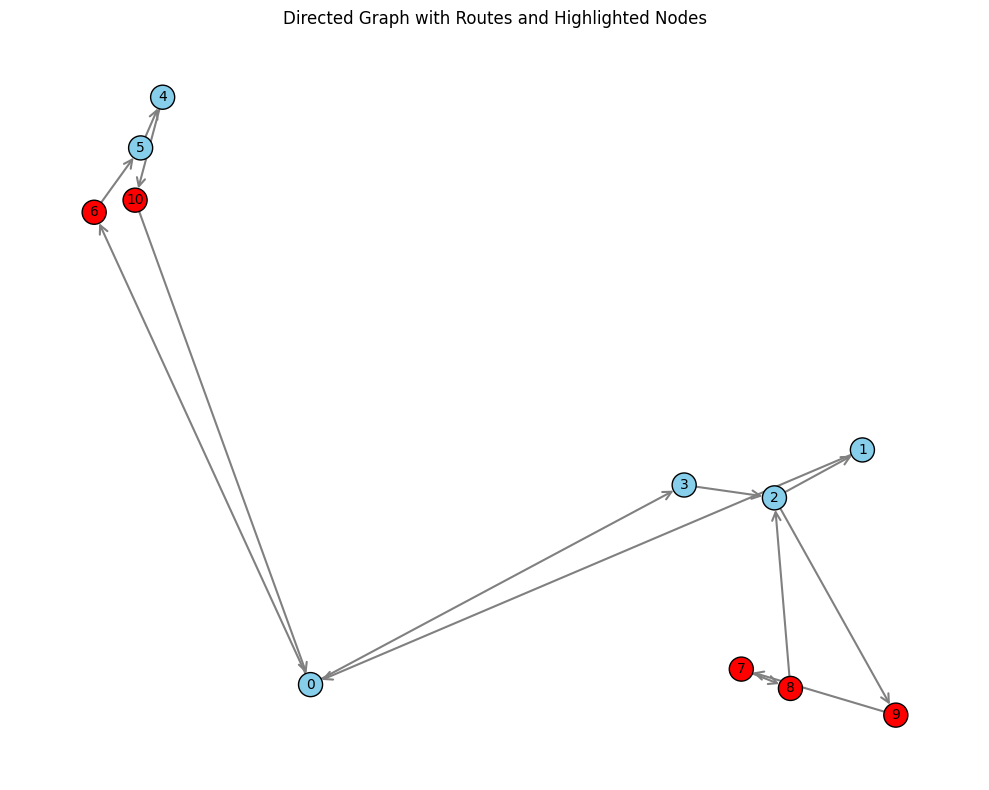

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import networkx as nx

# === Distance matrix ===
distance_matrix = np.array([
    [0,21,20,17,65,63,60,19,22,24,60],
    [21,0,4,6,60,58,55,15,18,20,55],
    [20,4,0,4,59,56,53,13,8,12,53],
    [17,6,4,0,57,54,52,11,13,16,52],
    [65,60,59,57,0,3,7,66,69,71,6],
    [63,58,56,54,3,0,4,64,66,69,3],
    [60,55,53,52,7,4,0,61,64,66,2],
    [19,15,13,11,66,64,61,0,3,5,61],
    [22,18,8,13,69,66,64,3,0,7,64],
    [24,20,12,16,71,69,66,5,7,0,66],
    [60,55,53,52,6,3,2,61,64,66,0]
])

labels = [str(i) for i in range(11)]

# === Step 1: MDS to get 2D coordinates ===
def distance_matrix_to_coordinates(distance_matrix):
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(distance_matrix)
    return coords

# === Step 2: Plot with NetworkX and routes ===
def plot_graph_with_routes(coords, routes, labels, highlight_nodes=None):
    G = nx.DiGraph()  # Directed graph for arrows

    # Add all nodes
    for i, label in enumerate(labels):
        G.add_node(label, pos=coords[i])

    # Add directional edges from the routes
    for route in routes:
        for i in range(len(route) - 1):
            G.add_edge(str(route[i]), str(route[i + 1]))

    pos = nx.get_node_attributes(G, 'pos')

    plt.figure(figsize=(10, 8))

    # === Node coloring logic ===
    node_colors = []
    for label in labels:
        if highlight_nodes and label in highlight_nodes:
            node_colors.append('red')
        else:
            node_colors.append('skyblue')

    # Draw nodes
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=300,
        edgecolors='black'
    )

    # Draw directed edges (with arrows)
    nx.draw_networkx_edges(
        G, pos,
        edge_color='gray',
        width=1.5,
        arrows=True,
        arrowstyle='->',
        arrowsize=15
    )

    # Draw labels
    nx.draw_networkx_labels(
        G, pos,
        font_size=10,
        font_color='black'
    )

    plt.title("Directed Graph with Routes and Highlighted Nodes")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# === Your routes ===
routes = [
    [0, 3, 2, 9, 7, 8, 2, 1, 0],
    [0, 6, 5, 4, 10, 0]
]

# Run it
coords = distance_matrix_to_coordinates(distance_matrix)
print("Coordinates of nodes:", coords)
# move down the nodes 6, 10, 5 and 4
coords = coords.astype(float).copy()
coords[6] += [0, -30.5]
coords[10] += [0, -30.5]
coords[5] += [0, -30.5]
coords[4] += [0, -30.5]
print("Adjusted coordinates of nodes:", coords)
plot_graph_with_routes(coords, routes, labels, highlight_nodes=[str(i) for i in range(6,11)])

---
# Benchmarks

In [4]:
df_b = pd.read_csv('MCTTRP.csv')
df_b.head()

,id,cost,time,solution
0,1,844.278,50.566,Route 1: 16 50 34 30 9 ; Route 2: 25 14 6 ; Ro...
1,1,963.036,19.355,Route 1: 37 34 21 29 2 22 ; Route 2: 41 4 18 ;...
2,1,887.704,88.647,Route 1: 1 22 3 36 35 20 ; Route 2: 7 43 24 23...
3,1,856.711,122.205,Route 1: 1 36 35 20 2 ; Route 2: 41 13 40 19 4...
4,1,874.828,38.855,Route 1: 12 17 37 15 45 33 ; Route 2: 47 4 13 ...


In [50]:
# I want a new df with the min cost, the average cost, the number of route in the solution, and the average time for each id
df_summary = df_b.groupby('id').agg(
    min_cost=('cost', 'min'),
    avg_cost=('cost', 'mean'),
    num_routes=('solution', lambda x: len(re.findall(r'Route \d+:', x.loc[x.idxmin()]))),
    avg_time=('time', 'mean')
).reset_index()
# print to latex with 2 decimal places and remove the 0s in the decimal places
df_summary['min_cost'] = df_summary['min_cost'].astype(float)


df_summary['min_cost'] = df_summary['min_cost'].round(2)
df_summary['avg_cost'] = df_summary['avg_cost'].round(2)
df_summary['avg_time'] = df_summary['avg_time'].round(2)
latex_table_summary = df_summary.to_latex(index=False)
print(latex_table_summary)

\begin{tabular}{rrrrr}
\toprule
id & min_cost & avg_cost & num_routes & avg_time \\
\midrule
1 & 844.280000 & 917.810000 & 11 & 50.820000 \\
2 & 816.080000 & 865.210000 & 10 & 64.700000 \\
3 & 822.280000 & 896.910000 & 10 & 45.990000 \\
4 & 1409.850000 & 1498.580000 & 20 & 144.890000 \\
5 & 1293.940000 & 1491.750000 & 20 & 160.940000 \\
6 & 1329.500000 & 1455.260000 & 19 & 253.400000 \\
7 & 1557.240000 & 1649.800000 & 16 & 309.710000 \\
8 & 1341.710000 & 1528.900000 & 15 & 354.300000 \\
9 & 1246.930000 & 1350.190000 & 14 & 590.480000 \\
10 & 2176.630000 & 2296.180000 & 23 & 1260.460000 \\
11 & 1877.750000 & 2056.760000 & 23 & 1542.060000 \\
12 & 1643.790000 & 1969.530000 & 22 & 1903.090000 \\
13 & 2862.240000 & 3069.610000 & 37 & 3879.200000 \\
14 & 2677.430000 & 2864.300000 & 30 & 2978.620000 \\
15 & 2379.760000 & 2600.310000 & 33 & 3435.830000 \\
16 & 2369.760000 & 2616.620000 & 15 & 355.810000 \\
17 & 2418.340000 & 2617.600000 & 15 & 514.600000 \\
18 & 2264.710000 & 2559.600000 & 15

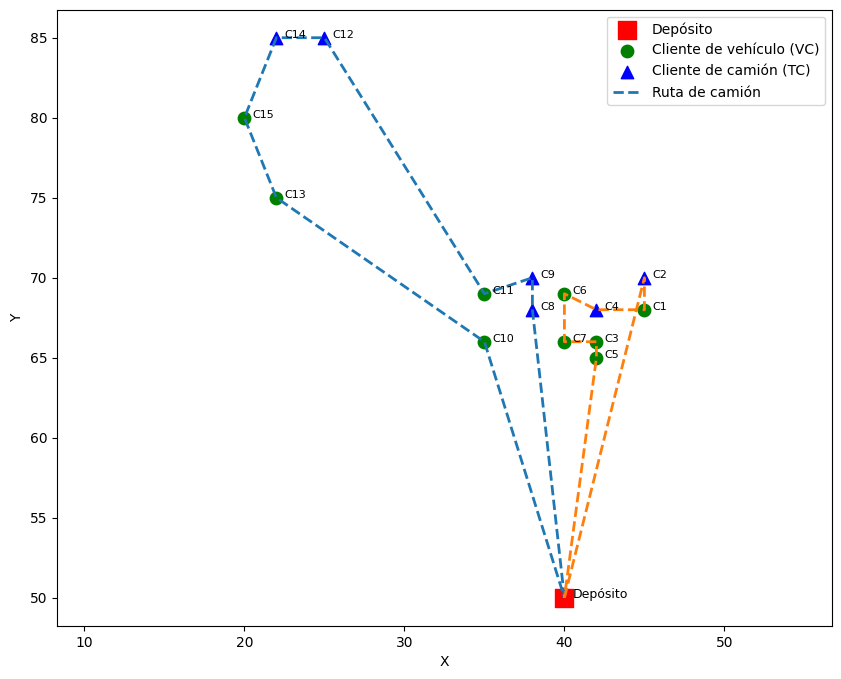

In [84]:
import matplotlib.pyplot as plt

with open('instances/test_MCTTRP.txt') as f:
    file_lines = [line.strip() for line in f if line.strip() and not line.startswith('#')]
    
# Parse depot
depot_line = file_lines[2].split()
depot = (float(depot_line[1]), float(depot_line[2]))

# Parse clients
clients = []
for line in file_lines[3:]:
    parts = line.split()
    cust_id = int(parts[0])
    x, y = float(parts[1]), float(parts[2])
    is_truck = bool(int(parts[3]))  # 1 = truck customer
    clients.append((cust_id, x, y, is_truck))

# Plot
plt.figure(figsize=(10, 8))

# Plot depot
plt.scatter(depot[0], depot[1], c='red', marker='s', s=150, label='Depósito')
plt.text(depot[0] + 0.5, depot[1], 'Depósito', fontsize=9)

# Plot clients
for cust_id, x, y, is_truck in clients:
    color = 'blue' if is_truck else 'green'
    marker = '^' if is_truck else 'o'
    label = 'Cliente de camión (TC)' if is_truck else 'Cliente de vehículo (VC)'
    plt.scatter(x, y, c=color, marker=marker, s=80, label=label if cust_id == 1 or cust_id == 2 else "")
    plt.text(x + 0.5, y, f'C{cust_id}', fontsize=8)

# Optional: plot a sample route (replace with real one)
sample_route = [0, 8, 9, 11, 12, 14, 15, 13, 10, 0]  # node IDs
sample_route_2 = [0, 2, 1, 4, 6, 7, 3, 5, 0]  # node IDs
nodes_dict = {0: depot}
for cust_id, x, y, _ in clients:
    nodes_dict[cust_id] = (x, y)

route_coords = [nodes_dict[i] for i in sample_route]
route_coords_2 = [nodes_dict[i] for i in sample_route_2]
xs, ys = zip(*route_coords)
plt.plot(xs, ys, linestyle='--', linewidth=2, label='Ruta de camión')
xs2, ys2 = zip(*route_coords_2)
plt.plot(xs2, ys2, linestyle='--', linewidth=2)

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
# plt.grid(True)
plt.axis("equal")
plt.show()

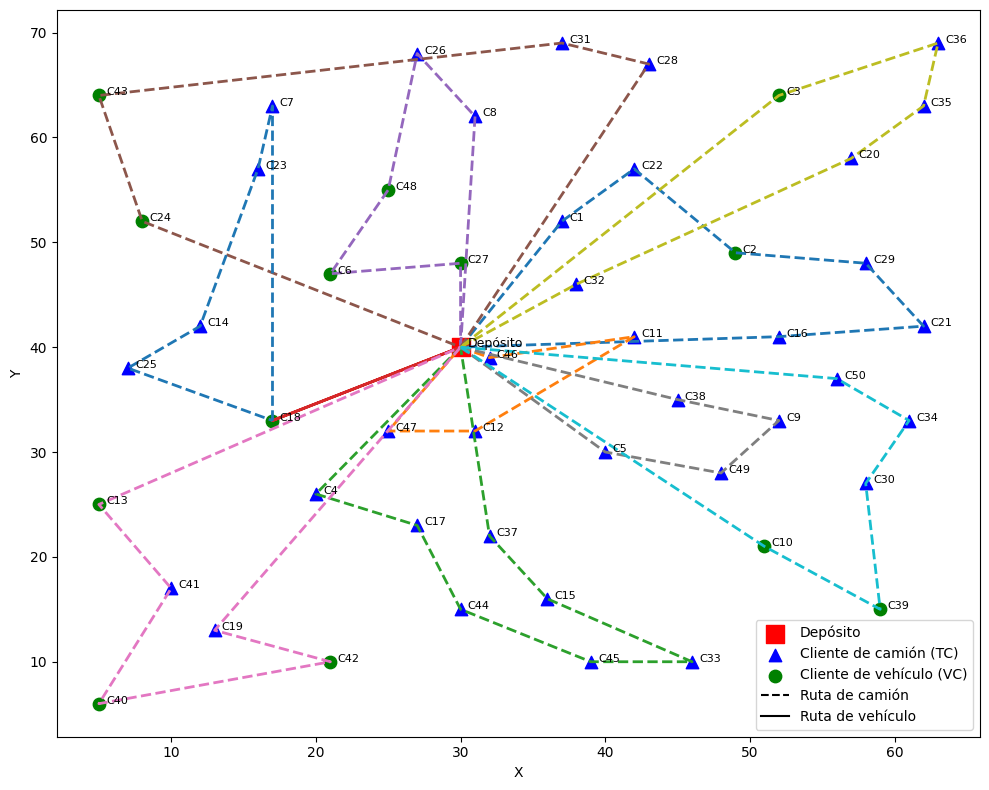

In [90]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Read and clean file lines
with open('instances/CHAO_MCTTRP_03.txt') as f:
    file_lines = [line.strip() for line in f if line.strip() and not line.startswith('#')]

# Parse depot
depot_line = file_lines[2].split()
depot = (float(depot_line[1]), float(depot_line[2]))

# Parse clients
clients = []
for line in file_lines[3:]:
    parts = line.split()
    cust_id = int(parts[0])
    x, y = float(parts[1]), float(parts[2])
    is_truck = bool(int(parts[3]))  # 1 = truck customer
    clients.append((cust_id, x, y, is_truck))

# Define routes
routes = "Route 1: 1 22 2 29 21 16 ; Route 2: 46 11 12 47 ; Route 3: 4 17 44 45 33 15 37 ; Route 4: 18 ; Route 5: 8 26 48 6 27 ; Route 6: 28 31 43 24 ; Route 7: 19 42 40 41 13 ; Route 8: 38 9 49 5 ; Route 9: 32 20 35 36 3 ; Route 10: 50 34 30 39 10 ; "

# Parse routes and add depot at start and end
raw_routes = routes.strip().split(';')[:-1]
parsed_routes = []
for route_str in raw_routes:
    parts = route_str.split(':')[1].strip().split()
    customer_ids = [0] + list(map(int, parts)) + [0]
    parsed_routes.append(customer_ids)

parsed_routes.append([18, 7, 23, 14, 25, 18])

# Create a lookup for coordinates
client_lookup = {cust_id: (x, y) for cust_id, x, y, _ in clients}
client_lookup[0] = depot  # Add depot

# Begin plotting
plt.figure(figsize=(10, 8))

# Plot depot
plt.scatter(depot[0], depot[1], c='red', marker='s', s=150, label='Depósito')
plt.text(depot[0] + 0.5, depot[1], 'Depósito', fontsize=9)

# Plot clients
for cust_id, x, y, is_truck in clients:
    color = 'blue' if is_truck else 'green'
    marker = '^' if is_truck else 'o'
    label = 'Cliente de camión (TC)' if is_truck else 'Cliente de vehículo (VC)'
    # Only show label once per type
    show_label = cust_id == 1 or cust_id == 2
    plt.scatter(x, y, c=color, marker=marker, s=80, label=label if show_label else "")
    plt.text(x + 0.5, y, f'C{cust_id}', fontsize=8)

# Plot routes with appropriate line styles
for i, route in enumerate(parsed_routes, start=1):
    coords = [client_lookup[cust_id] for cust_id in route]
    x_vals, y_vals = zip(*coords)

    first_client_id = route[1]  # First client after depot
    is_truck = next(is_tc for cid, _, _, is_tc in clients if cid == first_client_id)
    linestyle = '--' if is_truck else '-'

    plt.plot(x_vals, y_vals, linestyle=linestyle, linewidth=2)

# Final plot setup
# Final plot setup
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Añadir manualmente las rutas si no estaban ya
extra_legend = [
    Line2D([0], [0], linestyle='--', color='black', label='Ruta de camión'),
    Line2D([0], [0], linestyle='-', color='black', label='Ruta de vehículo')
]

# Añadir solo si no están ya presentes
for item in extra_legend:
    if item.get_label() not in by_label:
        by_label[item.get_label()] = item

# Mostrar leyenda final
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X")
plt.ylabel("Y")
# plt.grid(True)
plt.tight_layout()
plt.show()


In [101]:
import pandas as pd
import re

latex_rows = r"""1  &  & 844.28  & 624.74  &  & &  917.81 & 627.98  &  & & 11 & 8  & & \textbf{50.82}   & 769.98
    2  &  & 816.08  & 702.20  &  & &  865.21 & 724.42  &  & & 10 & 8  & & \textbf{64.70}   & 1896.85
    3  &  & 822.28  & 741.43  &  & &  896.91 & 750.23  &  & & 10 & 8  & & \textbf{45.99 }  & 1659.00
    4  &  & 1409.85 & 895.62  &  & & 1498.58 & 907.95  &  & & 20 & 13 & & \textbf{144.89}  & 2366.98
    5  &  & 1293.94 & 986.80  &  & & 1491.75 & 1000.30 &  & & 20 & 14 & & \textbf{160.94}  & 2506.17
    6  &  & 1329.50 & 1089.63 &  & & 1455.26 & 1109.27 &  & & 19 & 13 & & \textbf{253.40}  & 2071.00
    7  &  & 1557.24 & 928.40  &  & & 1649.80 & 946.50  &  & & 16 & 11 & & \textbf{309.71}  & 2843.47
    8  &  & 1341.71 & 997.44  &  & & 1528.90 & 1005.27 &  & & 15 & 12 & & \textbf{354.30}  & 2895.57
    9  &  & 1246.93 & 1059.51 &  & & 1350.19 & 1105.31 &  & & 14 & 11 & & \textbf{590.48}  & 2808.01
    10 &  & 2176.63 & 1256.32 &  & & 2296.18 & 1271.75 &  & & 23 & 18 & & \textbf{1260.46} & 3314.64
    11 &  & 1877.75 & 1337.16 &  & & 2056.76 & 1355.02 &  & & 23 & 18 & & \textbf{1542.06} & 3156.77
    12 &  & 1643.79 & 1394.58 &  & & 1969.53 & 1422.80 &  & & 22 & 18 & & \textbf{1903.09} & 3386.75
    13 &  & 2862.24 & 1587.07 &  & & 3069.61 & 1615.12 &  & & 37 & 23 & & 3879.20          & \textbf{3389.67}
    14 &  & 2677.43 & 1721.16 &  & & 2864.30 & 1750.71 &  & & 30 & 26 & & \textbf{2978.62} & 3154.42
    15 &  & 2379.76 & 1773.33 &  & & 2600.31 & 1817.12 &  & & 33 & 25 & & 3435.83          & \textbf{3381.31}
    16 &  & 2369.76 & 1437.49 &  & & 2616.62 & 1491.31 &  & & 15 & 11 & & \textbf{355.81}  & 3322.51
    17 &  & 2418.34 & 1549.24 &  & & 2617.60 & 1631.11 &  & & 15 & 11 & & \textbf{514.60}  & 3372.20
    18 &  & 2264.71 & 1522.39 &  & & 2559.60 & 1589.44 &  & & 15 & 11 & & \textbf{572.15}  & 3531.53
    19 &  & 1567.61 & 876.95  &  & & 1724.68 & 917.27  &  & & 14 & 12 & & \textbf{258.21}  & 2139.40
    20 &  & 1302.46 & 965.85  &  & & 1476.99 & 997.90  &  & & 13 & 13 & & \textbf{224.94}  & 2578.43
    21 &  & 1398.84 & 960.92  &  & & 1540.21 & 977.19  &  & & 14 & 12 & & \textbf{339.24}  & 2385.56
"""

# Clean LaTeX and split into lines
cleaned = re.sub(r'\\textbf{([^}]+)}', r'\1', latex_rows)  # remove \textbf
cleaned = cleaned.strip().splitlines()

# Split each line by '&' and clean whitespace
data = [list(map(str.strip, re.split(r'&', line))) for line in cleaned]

# Optional: remove empty columns (if there are many blanks)
data = [[cell for cell in row if cell] for row in data]

columns = [
    'ID', 'Value1', 'Value2', 'Value3', 
    'Value4', 'Value5', 'Count1', 'Count2', 
    'Metric1', 'Metric2'
]

# Adjust if the number of columns doesn’t match
df = pd.DataFrame(data, columns=columns[:len(data[0])])

# Convert numeric columns
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# print(df.head())

# absolute % error from value 1 to value 2
df['Abs_Percent_Error'] = ((df['Value2'] - df['Value1']).abs() / df['Value1']) * 100
df['Abs_Percent_Error'] = df['Abs_Percent_Error'].round(2)

df['Abs_Percent_Error_2'] = ((df['Value3'] - df['Value4']).abs() / df['Value3']) * 100
df['Abs_Percent_Error_2'] = df['Abs_Percent_Error_2'].round(2)


df['Abs_Percent_Time_Error'] = ((df['Count2'] - df['Metric1']) / df['Count2']) * 100
df['Abs_Percent_Time_Error'] = df['Abs_Percent_Time_Error'].round(2)
print("Error en el coste minimo:",df['Abs_Percent_Error'].mean(),"\nError en el coste medio:", df['Abs_Percent_Error_2'].mean(),"\nMejora en el tiempo:", df['Abs_Percent_Time_Error'].mean())

Error en el coste minimo: 29.064285714285717 
Error en el coste medio: 33.93476190476191 
Mejora en el tiempo: -856.9019047619046
